✅unsupervised anomaly detection methods :

Isolation forest, one class SVM, Auto encoders

✅ Unsupervised Learning Definition
In unsupervised learning, the model:

Does not use labeled data during training

Learns patterns or structure from the input data only

Is typically used for tasks like clustering, dimensionality reduction, and anomaly detection



💡 What Is Anomaly Detection?
Anomaly detection is a technique used to find unusual or unexpected data points — things that don’t fit the normal pattern.

💡Feature engineering is about transforming the data to improve model performance (onhot encoding, handling missing data,...)

💡EDA is about understanding the data. Explore, visualize, and summarize the main characteristics of the dataset.

1. from data.describe we undertsand mean and std for each features

2. undertand dtype for each feature if its numeric or categorical 

3. distribution if its weel or skeweed using histplot and distplot

4. outliers using boxplot

5. correlaton matrix to undertsad relation of features to see how to reduce features

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("creditcard.csv")

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.drop(columns=['Class'],inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [7]:
data.shape

(284807, 30)

A small standard deviation (std) means the data is tightly grouped around the mean, but that doesn’t always mean the distribution is “good” or “normal.” We can check distribution usinh histplot or distplot



In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


If you have two features:

Amount: ranges from 0 to 10,000

V1: ranges from -2 to 2

Then PCA or other algorithms will give more weight to Amount, just because its values are bigger, not because it’s more important! So mean =0 mean distbute points  so that all of them ceneterd at zero

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\3758815730.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Amount'])
C:\Users\asus\AppData\Local\Temp\ipykernel_9820\3758815730.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Time'])


<Axes: xlabel='Time', ylabel='Density'>

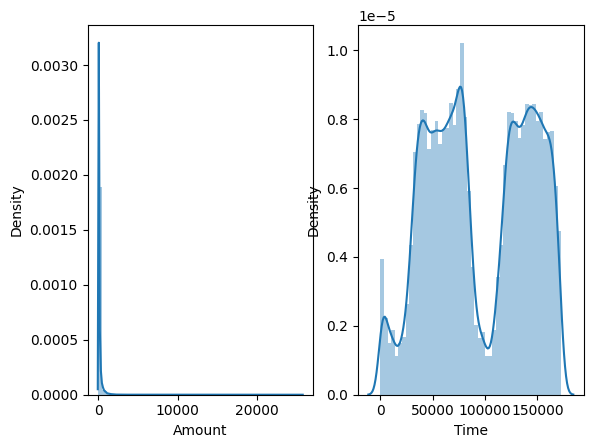

In [9]:

plt.subplot(1,2,1)
sns.distplot(data['Amount'])
plt.subplot(1,2,2)
sns.distplot(data['Time'])



Time and amount are not distributed well

Time’s large values will dominate. Models like PCA or Isolation Forest will focus mostly on Time instead of a balanced view.

By standardizing:

Both features will be transformed to have mean = 0 and std = 1.

It puts all features on the same scale, so one feature with big numbers doesn’t dominate.

<Axes: xlabel='Time', ylabel='Count'>

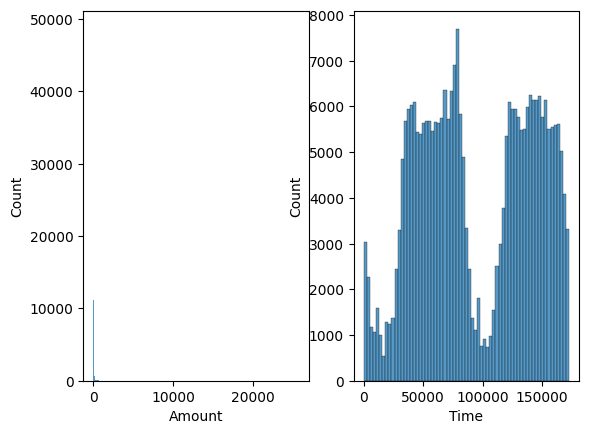

In [10]:

plt.subplot(1,2,1)
sns.histplot(data['Amount'])
plt.subplot(1,2,2)
sns.histplot(data['Time'])

Using sns.distplot, I can observe the range of values on the x-axis. If the values are close to each other and form a bell-shaped curve, it indicates that the standard deviation is low and the data is well distributed. However, if the distribution is skewed to the right or left, this suggests the presence of outliers, the values are more spread out, and the standard deviation is higher.

Machine learnng doesnot understand the unit of values of data so data scaling should be applies:

1. If feature is skewed, has outliers or non-Gaussian, normalization often works better to squash values into a range.(range values btw 0 and 1)

2. If feature is roughly Gaussian, standardization works well.(mean =0 and std=1)

This data scaling shoud be done before PCA and clustering

StandardScaler → for PCA ✅

PCA → reduce dimensions ✅

MinMaxScaler → for clustering ✅

Step 1: Before PCA
Always apply Standardization (use StandardScaler) to all features.

This means: subtract the mean and divide by the standard deviation for each feature.

Why? PCA works best when data is centered and scaled.

Step 2: Before K-Means Clustering
Check the shape of your features’ distributions (you can use a histogram or distplot).

For features that look like a bell curve (Gaussian/normal): apply Standardization (same as step 1).

For features that look skewed or have outliers: apply Normalization (use MinMaxScaler) to squash values between 0 and 1.

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mms=MinMaxScaler()
ss=StandardScaler()


1. Time (in seconds)

2. Amount (in dollars)

3. V1 to V28 (PCA-transformed, unitless)

4. Then we MUST apply data scaling before using most machine learning models.

5. When to Use Standardization (Mean=0, Std=1):
    - When features have different units or scales and you want to center data and make variances comparable.

    - When using PCA, SVM, Isolation Forest, or other algorithms that assume data is centered.

6. When to Use Normalization (Scaling to [0,1]):

     - When features have different units but you want all values bounded in the same range.

     - When using algorithms sensitive to distance and where relative scale matters, such as(Clustering (KMEAN....),AUtoencoder)



In [12]:
#standarization before PCA because all fetaures have # unit
c=list(data.columns)
c


['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [13]:
for i in c:
    data[i]=ss.fit_transform(data[[i]])

In [14]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [15]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-3.065637e-16,-1.506872e-17,-9.580116e-18,-8.622104e-17,-5.189230e-18,3.832046e-17,9.979288e-18,1.237432e-17,-3.193372e-18,7.234983e-19,...,-1.247411e-18,-3.642440e-18,3.193372e-18,8.781773e-18,9.580116e-18,-5.029561e-17,5.887780e-18,2.444925e-18,-7.908585e-18,2.913952e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.996583e+00,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,-8.552120e-01,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,-2.131453e-01,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,9.372174e-01,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,1.642058e+00,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


Now data features are standarized(same unit ) we can apply PCA to reduce number of features

In [16]:
from sklearn.decomposition import PCA
pca=PCA()

In [17]:
new=pca.fit_transform(data)

PCA: convert the original input features into new components and variance indicates how much the new component captures the original information.

After running PCA, we need to choose how many principal components to keep based on explained variance, then drop the rest.

In [18]:
new

array([[ 0.41663045, -2.53266428,  0.61575819, ..., -0.97450386,
        -0.27581306,  0.02083772],
       [-0.39345348, -2.0773255 ,  0.60029811, ...,  1.13661813,
        -0.76458219, -0.01490406],
       [ 1.86852545, -2.53349699, -0.07194548, ...,  0.82666618,
        -0.21358778, -0.13526557],
       ...,
       [-0.19406338,  2.07078798, -0.09638461, ..., -0.04603214,
         0.24503234,  0.00392092],
       [-0.46608925,  1.22539363,  0.01679354, ..., -1.37666609,
         1.07832866, -0.0242546 ],
       [ 0.76759651,  1.90590292, -0.14487119, ..., -0.21256488,
         0.45055744, -0.10879846]])

In [19]:
pca.explained_variance_

array([1.95826326, 1.6836999 , 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 0.31589583, 0.04215505])

In [20]:
final=pd.DataFrame(new)
final.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.416630,-2.532664,0.615758,0.434305,-0.202052,0.503704,0.207345,-0.372804,0.444146,0.354984,...,-0.707707,0.214207,0.478082,-0.777172,0.441819,1.221133,0.329165,-0.974504,-0.275813,0.020838
1,-0.393453,-2.077326,0.600298,0.071324,-0.483239,-0.423898,0.400443,-0.589043,0.036856,0.519000,...,0.202588,-0.239136,-0.600761,0.576989,-0.495292,-0.259381,-0.212173,1.136618,-0.764582,-0.014904
2,1.868525,-2.533497,-0.071945,1.494092,1.172747,1.186620,-0.613634,-2.119968,0.287948,1.092398,...,-0.596508,-1.244672,-1.378491,-2.523609,0.194882,1.190156,-0.136572,0.826666,-0.213588,-0.135266
3,0.315744,-1.783506,-0.175553,2.516096,1.071696,-0.758788,-0.945653,-0.392858,0.425380,-0.164391,...,0.314896,-0.617191,-0.735545,-0.672116,-1.424208,-1.013742,0.612713,0.541362,-1.028256,-0.050116
4,-0.004379,-1.488415,-0.445403,0.168959,-0.288938,0.575042,-0.099431,0.576535,0.057766,0.137390,...,0.180346,-0.197292,0.058801,0.593062,0.672125,1.632410,-0.233944,1.390793,-1.336490,-0.042204


In [21]:
final.drop(columns=[28,29],inplace=True)

In [22]:
final.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.416630,-2.532664,0.615758,0.434305,-0.202052,0.503704,0.207345,-0.372804,0.444146,0.354984,...,0.466061,0.733560,-0.707707,0.214207,0.478082,-0.777172,0.441819,1.221133,0.329165,-0.974504
1,-0.393453,-2.077326,0.600298,0.071324,-0.483239,-0.423898,0.400443,-0.589043,0.036856,0.519000,...,0.057282,-0.684427,0.202588,-0.239136,-0.600761,0.576989,-0.495292,-0.259381,-0.212173,1.136618
2,1.868525,-2.533497,-0.071945,1.494092,1.172747,1.186620,-0.613634,-2.119968,0.287948,1.092398,...,-2.143424,1.615213,-0.596508,-1.244672,-1.378491,-2.523609,0.194882,1.190156,-0.136572,0.826666
3,0.315744,-1.783506,-0.175553,2.516096,1.071696,-0.758788,-0.945653,-0.392858,0.425380,-0.164391,...,-0.919148,-0.161968,0.314896,-0.617191,-0.735545,-0.672116,-1.424208,-1.013742,0.612713,0.541362
4,-0.004379,-1.488415,-0.445403,0.168959,-0.288938,0.575042,-0.099431,0.576535,0.057766,0.137390,...,0.538087,1.458182,0.180346,-0.197292,0.058801,0.593062,0.672125,1.632410,-0.233944,1.390793


In [23]:
final.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-2.075692e-17,1.660553e-16,1.397100e-17,-5.089437e-18,1.466955e-17,-3.592544e-18,-1.496893e-19,-3.123517e-17,7.384673e-18,1.886085e-17,...,1.377142e-17,-9.929391e-18,3.991715e-19,-1.816230e-17,8.981359e-18,6.187158e-18,2.734325e-17,2.794201e-18,6.187158e-18,7.983430e-19
std,1.399380e+00,1.297575e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-8.643362e+00,-4.080572e+00,-1.285673e+01,-1.197753e+01,-3.385109e+01,-2.878160e+01,-3.152597e+01,-1.465640e+01,-3.410362e+01,-3.850798e+01,...,-9.591096e+00,-4.021997e+01,-2.707655e+01,-3.449029e+01,-2.281753e+01,-2.097705e+01,-3.100699e+01,-1.270187e+01,-2.466339e+01,-1.273644e+01
25%,-4.499731e-01,-1.065533e+00,-3.264019e-01,-4.684902e-01,-4.721904e-01,-6.112888e-01,-5.055194e-01,-5.753644e-01,-4.587141e-01,-4.842065e-01,...,-4.788304e-01,-5.238026e-01,-5.118157e-01,-4.959204e-01,-4.782485e-01,-6.249709e-01,-6.221258e-01,-4.195059e-01,-5.620796e-01,-6.239204e-01
50%,-3.472874e-01,-2.679456e-01,1.503509e-01,-1.421535e-03,5.132288e-02,-2.159982e-02,4.646796e-02,-2.322298e-02,-2.158163e-02,3.559335e-02,...,6.950397e-03,-5.227708e-02,-2.856167e-02,-6.979942e-03,-2.757391e-02,1.046624e-02,2.704693e-03,-7.688235e-02,-8.280250e-02,3.553281e-02
75%,-4.814420e-02,1.245121e+00,5.954912e-01,4.789591e-01,5.432991e-01,5.627972e-01,6.662070e-01,5.265725e-01,4.265219e-01,5.334791e-01,...,4.675682e-01,4.592832e-01,4.903861e-01,4.690080e-01,4.917363e-01,6.096823e-01,6.270897e-01,3.598179e-01,4.828897e-01,7.118333e-01
max,1.324681e+02,5.305730e+00,7.744026e+00,1.988549e+01,3.801006e+01,2.353761e+01,1.816453e+01,2.438998e+01,4.665868e+01,2.226639e+01,...,3.140487e+01,3.308273e+01,1.992772e+01,4.466160e+01,4.331207e+01,2.587834e+01,2.064177e+01,5.594787e+01,1.097816e+01,5.292802e+00


C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


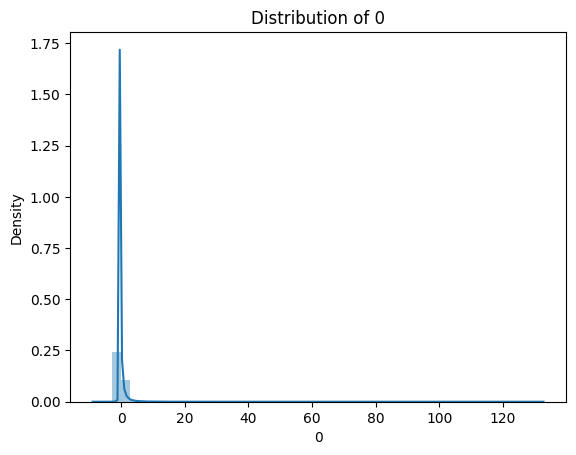

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


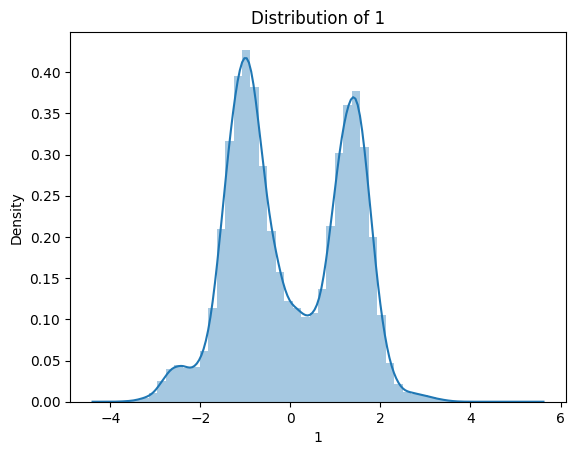

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


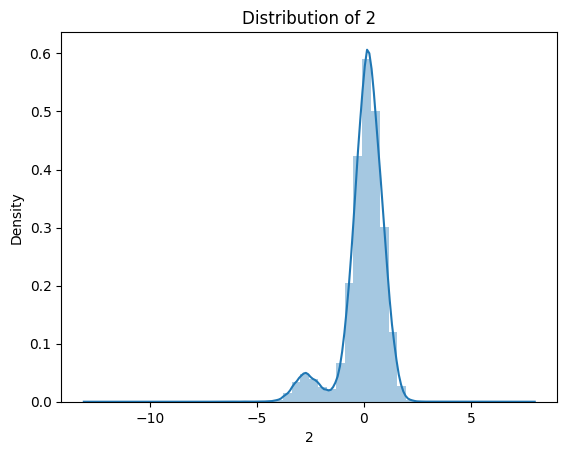

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


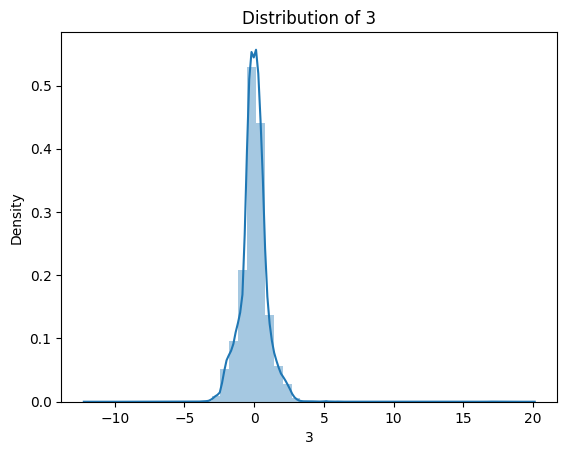

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


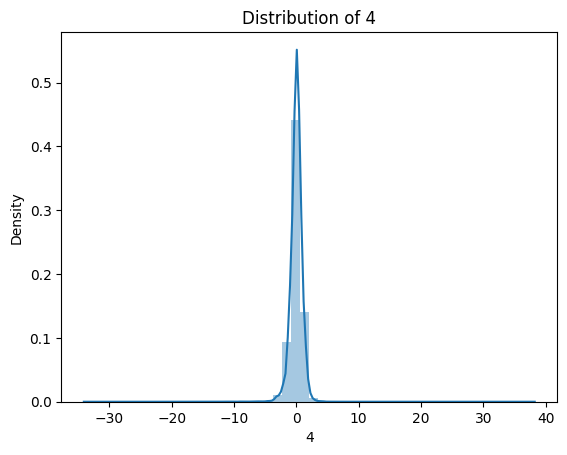

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


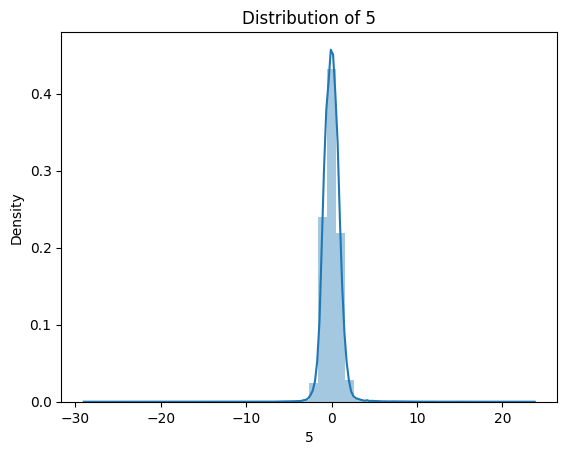

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


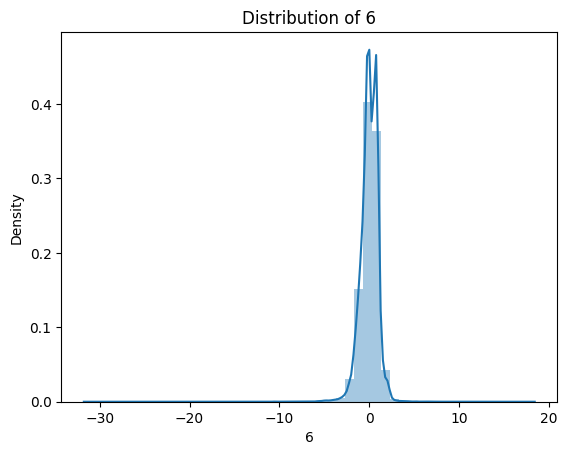

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


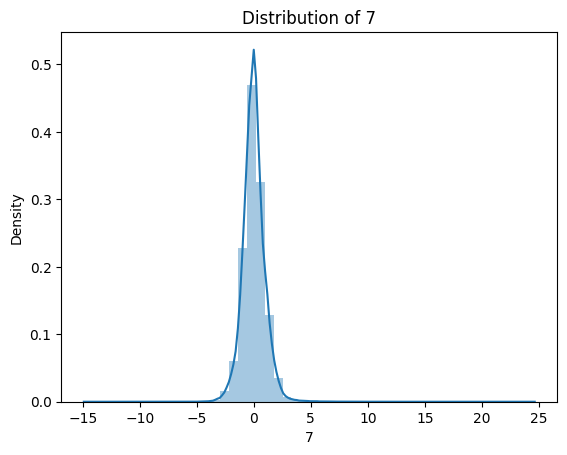

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


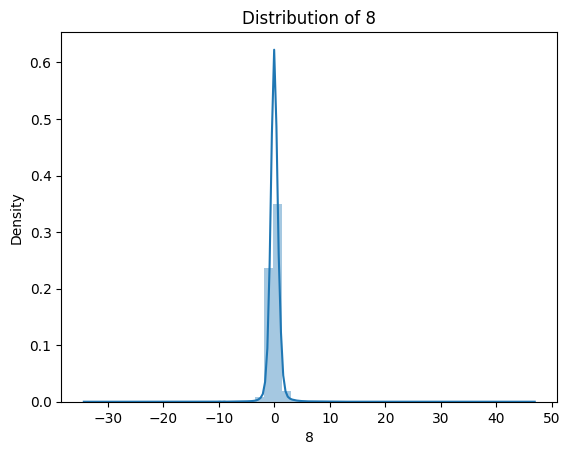

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


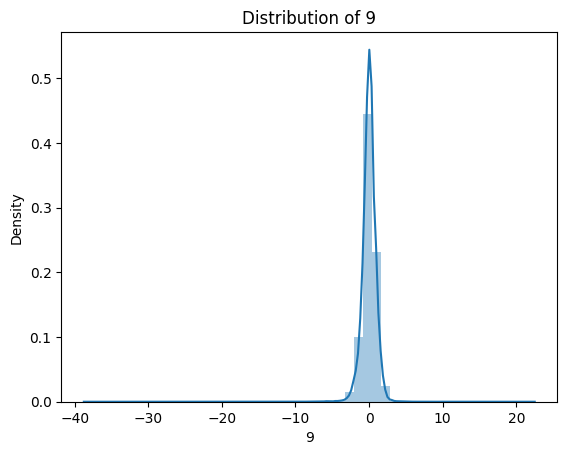

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


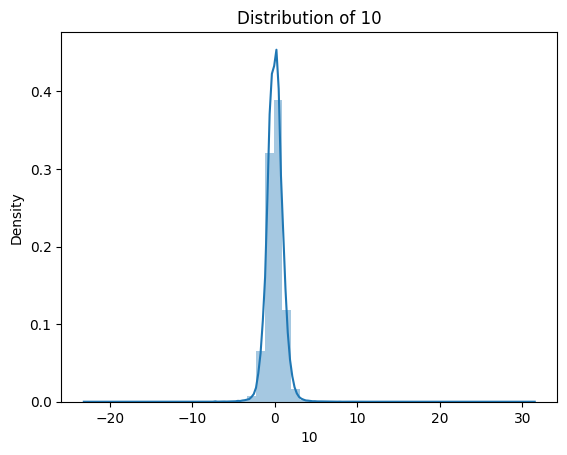

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


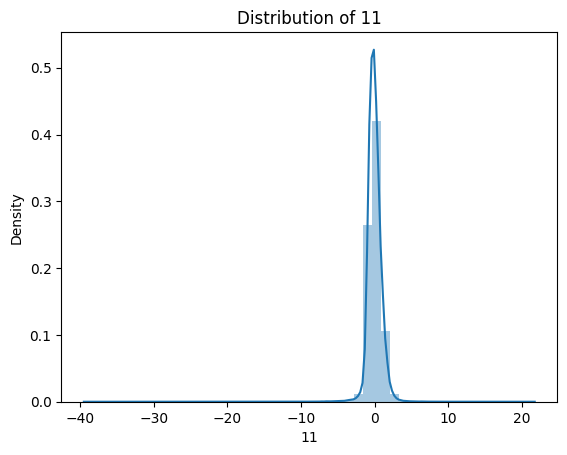

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


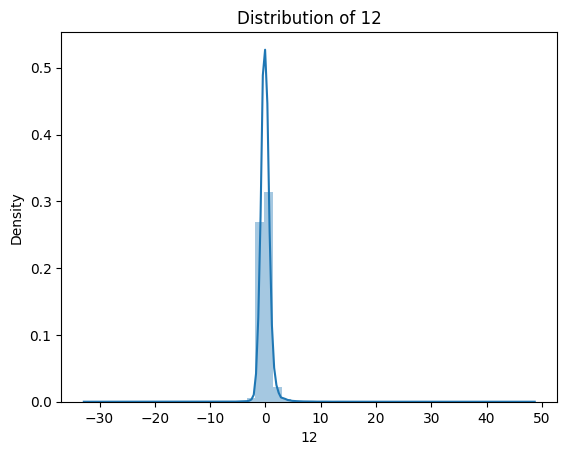

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


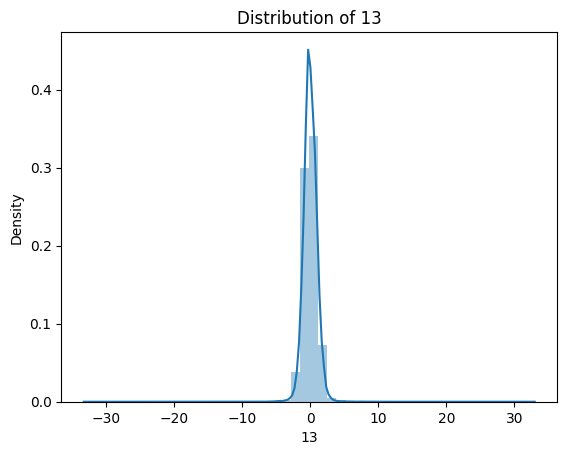

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


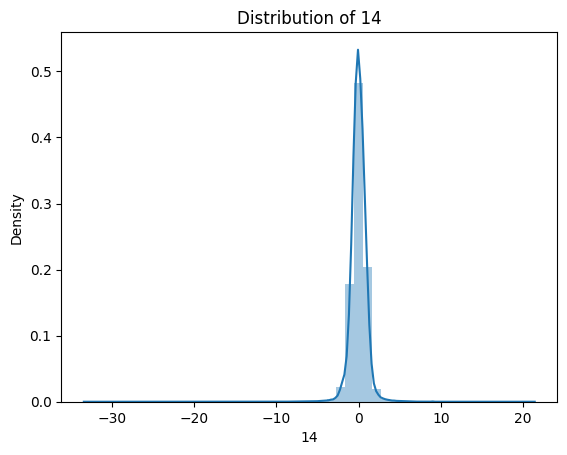

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


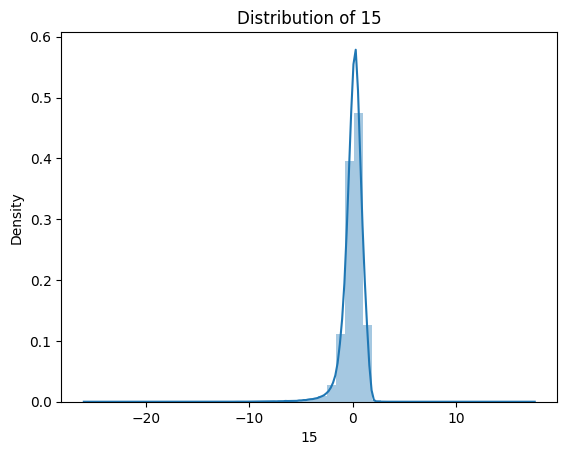

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


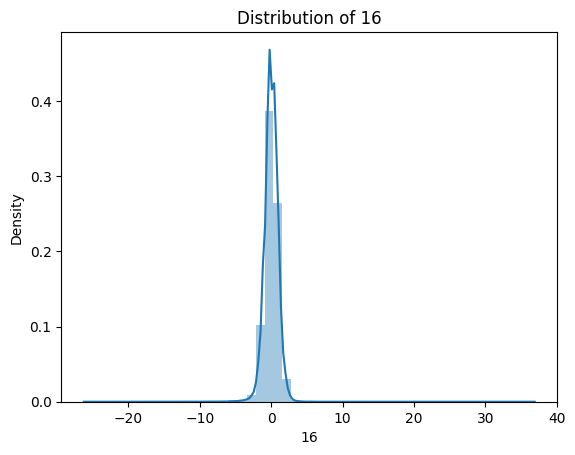

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


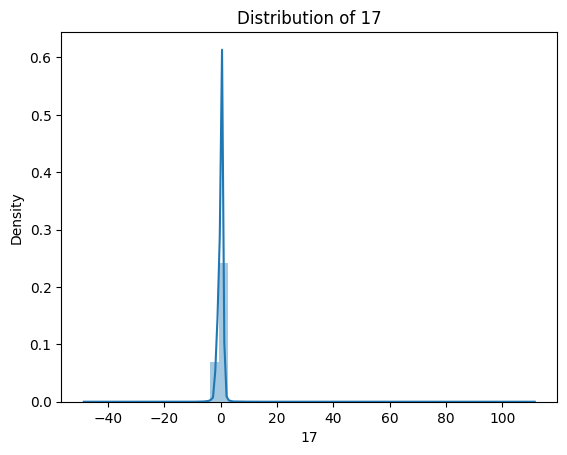

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


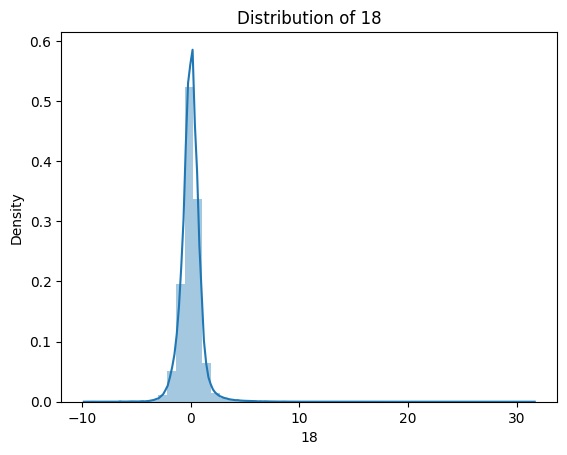

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


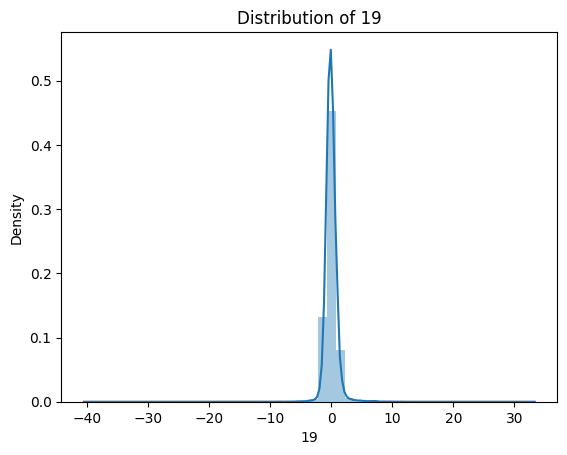

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


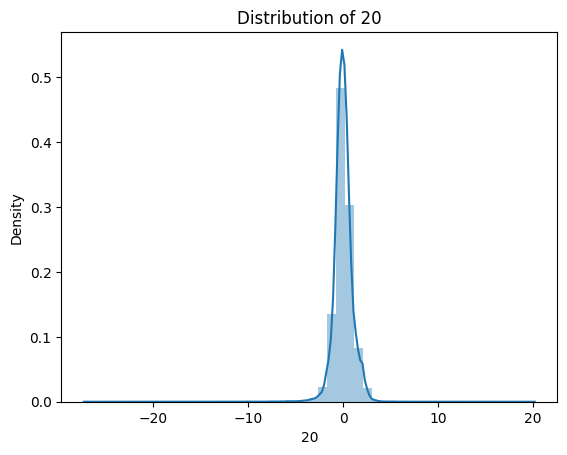

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


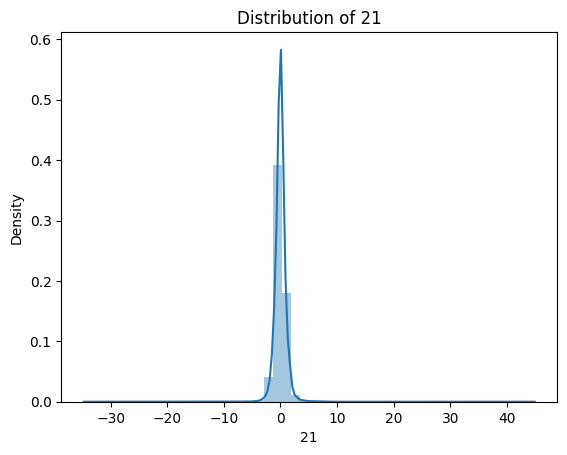

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


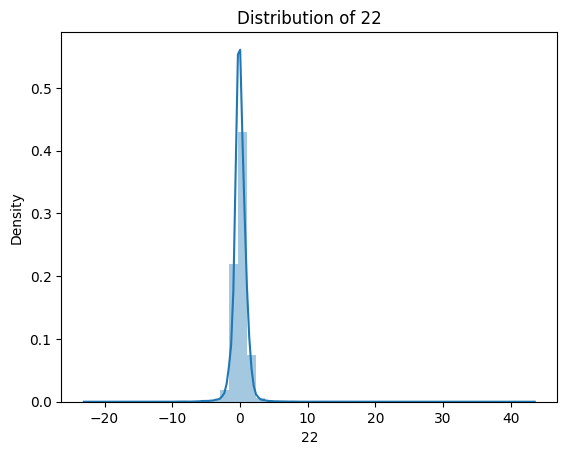

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


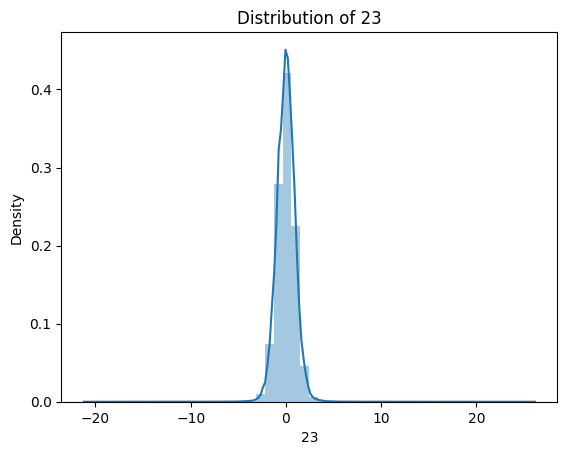

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


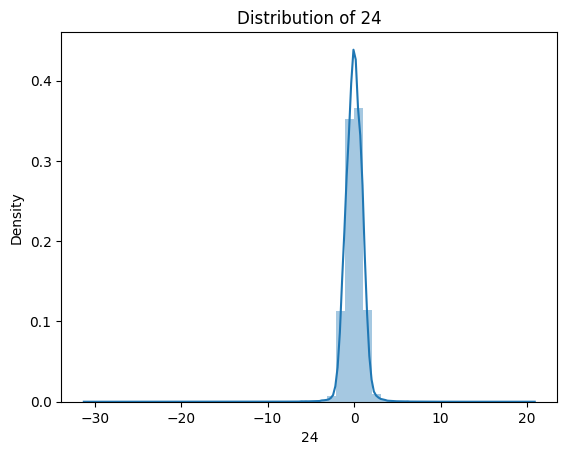

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


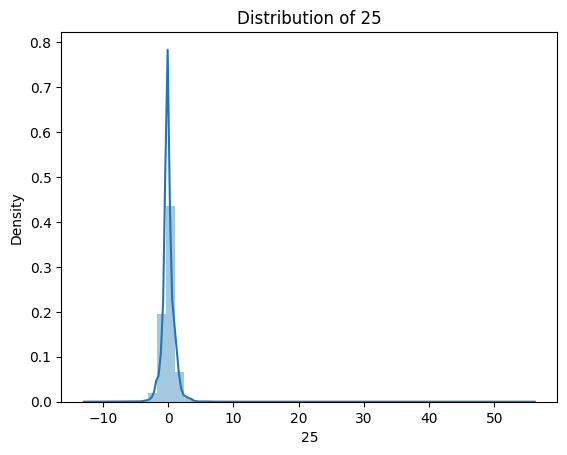

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


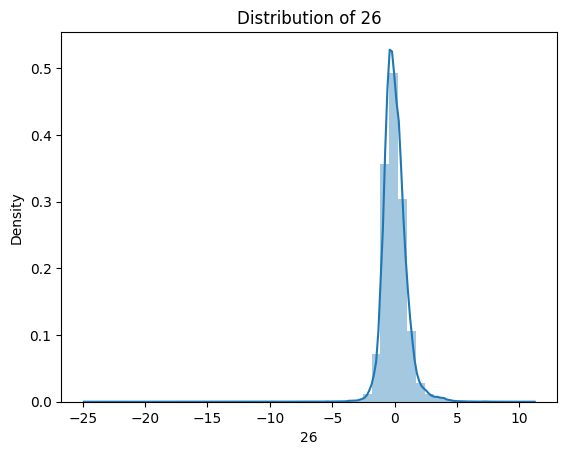

C:\Users\asus\AppData\Local\Temp\ipykernel_9820\2708758507.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final[i])  # kde=True adds the smooth curve


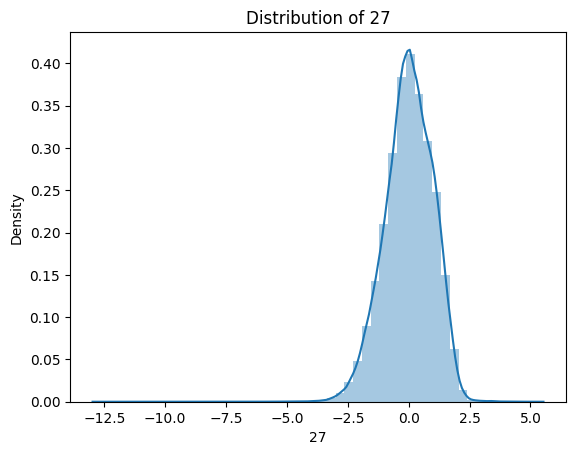

In [24]:
for i in final.columns[:28]:
    sns.distplot(final[i])  # kde=True adds the smooth curve
    plt.title(f'Distribution of {i}')
    plt.show()

Credit card fraud detection means finding unusual transactions.



Inertia(cost function) or distortion used to find best K not randomly which is called elbow method.

Inertia is the sum of squared euclidean distance from each point to centroid of cluster

Distortion is the distance from each point to centroid of cluster/ total number of points 

✅ Isolation Forest Workflow in Anomaly Detection

🔹 Training Phase (Unsupervised)

You feed the model only the features (Time, Amount, V1–V28).

No label (Class) is used.

The model learns by building random trees that try to isolate each point.

Points that are isolated very quickly (with fewer splits) are considered anomalies.

🔹 Scoring Phase

Every transaction gets an anomaly score.

You can set a threshold (e.g., anything above 0.7 is an anomaly).

🔹 Evaluation Phase (Now use labels)

You reveal the true labels (Class: 0 = normal, 1 = fraud).

You check:

Did the Isolation Forest flag the real frauds as anomalies?

You compute:

Precision: Of the transactions flagged as anomalies, how many were actually fraud?

Recall: Of all the actual fraud cases, how many did the model catch?

F1-score: Balance between precision and recall.

In [25]:
from sklearn.ensemble import IsolationForest

In [75]:
iso=IsolationForest(contamination=0.0017, random_state=42)
iso.fit(final)
pred=iso.predict(final)
#contamination=0.0017 tells the model to expect about 0.17% of the entire dataset are anomalies (outliers),

When you set contamination = 0.0017 (0.17%), the Isolation Forest:

Treats about 0.17% of your data points as the “most unusual” or “most isolated” (the anomalies).

It uses these points as a reference to compare all other points and decide which ones are normal or not.

In [27]:
pred

array([1, 1, 1, ..., 1, 1, 1])

An array of predictions, one for each data point (row) in final.

Each element is either:

1 — means the model thinks this point is normal (not an anomaly).

-1 — means the model flags this point as an anomaly (outlier).



In [63]:
num_anomalies = sum(x == -1 for x in pred)
print(num_anomalies)


485


In [29]:
original = pd.read_csv("creditcard.csv")
num_frauds = original[original['Class'] == 1].shape[0]
print(num_frauds)

492


Isolation Forest predicted about 485 anomalies

The original data has 492 actual fraud cases

OnClass SVM

In [30]:
from sklearn.svm import OneClassSVM

# Initialize the model
ocsvm = OneClassSVM(kernel='rbf', nu=0.0017, gamma='scale') 

# Train on your scaled features (no labels)
ocsvm.fit(final)

# Predict anomalies
pred2 = ocsvm.predict(final)  # +1 = normal, -1 = anomaly

# Count anomalies
num_anomalies = (pred2 == -1).sum()
print("Anomalies detected:", num_anomalies)


Anomalies detected: 1519


Evaluation for isolated forest

In [31]:
from sklearn.metrics import classification_report,precision_score,recall_score,confusion_matrix,accuracy_score

In [32]:
yorig=original['Class']

In [33]:
# Convert -1 (anomaly) to 1 (fraud), and 1 (normal) to 0 before evaluation
pred_mapped = np.where(pred == -1, 1, 0)
pred_mapped


array([0, 0, 0, ..., 0, 0, 0])

In [34]:
print(confusion_matrix(yorig,pred_mapped))

[[283961    354]
 [   361    131]]


[[TN, FP],

 [FN, TP]]

TN (True Negative) = 283,961 → Actual normal, predicted normal

FP (False Positive) = 354 → Actual normal, predicted fraud

FN (False Negative) = 361 → Actual fraud, predicted normal

TP (True Positive) = 131 → Actual fraud, predicted fraud

In [35]:
print(classification_report(yorig,pred_mapped))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.27      0.27      0.27       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807



Although the Isolation Forest and opensvm detects roughly the same number of anomalies as the actual number of fraud cases (about 500), it doesn’t necessarily identify the correct fraudulent transactions. This is why the precision and recall for class 1 (fraud) are low

In [36]:
precision_score(yorig,pred_mapped)
#TP/TP+FP

0.27010309278350514

transaction predicted as unnormal,  27% are actually positive(unnormal)(not great it misses 7%)

In [37]:
recall_score(yorig,pred_mapped)
#TP/TP+FN

0.266260162601626

transaction that are actually unnormal,  27% of them predicted as unnormal (not great it misses 73%)

Evaluation for onclass svm

In [38]:
pred2_mapped = np.where(pred2 == -1, 1, 0)
pred2_mapped

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
print(classification_report(yorig,pred2_mapped))
recall_score(yorig,pred2_mapped)




              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.09      0.28      0.14       492

    accuracy                           0.99    284807
   macro avg       0.55      0.64      0.57    284807
weighted avg       1.00      0.99      1.00    284807



0.2845528455284553

Improve performance by Tunning contamination in Isolation Forest (start with 0.005–0.02)

In [40]:
contamination_values = [0.001, 0.002, 0.005, 0.01, 0.02,0.03,0.1]
best_f1 = 0
best_cont = None

for cont in contamination_values:
    iso = IsolationForest(contamination=cont, random_state=42)
    iso.fit(final)
    pred3 = iso.predict(final)

    # Map predictions: -1 = anomaly → 1, 1 = normal → 0
    pred3_mapped = np.where(pred3 == -1, 1, 0)

    prec = precision_score(yorig, pred3_mapped)
    rec = recall_score(yorig, pred3_mapped)

    print(f"Contamination: {cont:.4f}, Precision: {prec:.2f}, Recall: {rec:.2f}")

   


Contamination: 0.0010, Precision: 0.32, Recall: 0.18
Contamination: 0.0020, Precision: 0.25, Recall: 0.28
Contamination: 0.0050, Precision: 0.17, Recall: 0.48
Contamination: 0.0100, Precision: 0.11, Recall: 0.64
Contamination: 0.0200, Precision: 0.07, Recall: 0.80
Contamination: 0.0300, Precision: 0.05, Recall: 0.83
Contamination: 0.1000, Precision: 0.02, Recall: 0.90


1. Try AutoEncoder to get get perfect result

2. Autoencoder: Unsupervised neural network that is used to detect outliers

3. Neural networks perform better with inputs between 0 and 1, especially when using activations like sigmoid, relu, or tanh.

✅  Neural network in general:

The input layer receives pixel values.

Early hidden layers detect simple features (edges, corners).

Deeper layers combine those into complex features (eyes, nose).

The output layer gives the class prediction (e.g., “dog”).

✅  Autoencoder:

Give the autoencoder your data — for example, a vector of 30 numbers (features).

Hidden layers learn features by compressing and decompressing the data.

The bottleneck is the compressed knowledge.

If input is normal, autoencoder reconstructs well.

If input is anomalous, reconstruction is poor → high error → anomaly detected.

✅ PCA needs standardized data to work well.

Autoencoder needs normalized inputs (0 to 1) for stable training.

So standardize → PCA → normalize → autoencoder is a good flow.



In [41]:
import tensorflow as tf
from tensorflow.keras import Model#keras python library to build neural network
from tensorflow.keras.layers import Input,Dense #Input is the shape on input data


In [42]:
dataset=pd.read_csv("creditcard.csv")
dataset.drop(columns=['Class'],inplace=True)
norm=StandardScaler()# normalization before autoencoder
final=norm.fit_transform(dataset)
finaldata=pd.DataFrame(final,columns=dataset.columns)
finaldata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [43]:
pc=PCA()
cleaned=pc.fit_transform(finaldata)
cleaned

array([[ 0.41663045, -2.53266428,  0.61575819, ..., -0.97450386,
        -0.27581306,  0.02083772],
       [-0.39345348, -2.0773255 ,  0.60029811, ...,  1.13661813,
        -0.76458219, -0.01490406],
       [ 1.86852545, -2.53349699, -0.07194548, ...,  0.82666618,
        -0.21358778, -0.13526557],
       ...,
       [-0.19406338,  2.07078798, -0.09638461, ..., -0.04603214,
         0.24503234,  0.00392092],
       [-0.46608925,  1.22539363,  0.01679354, ..., -1.37666609,
         1.07832866, -0.0242546 ],
       [ 0.76759651,  1.90590292, -0.14487119, ..., -0.21256488,
         0.45055744, -0.10879846]])

In [44]:
pc.explained_variance_

array([1.95826326, 1.6836999 , 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 0.31589583, 0.04215505])

In [45]:
afterpca=pd.DataFrame(cleaned)

In [46]:
afterpca.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.416630,-2.532664,0.615758,0.434305,-0.202052,0.503704,0.207345,-0.372804,0.444146,0.354984,...,-0.707707,0.214207,0.478082,-0.777172,0.441819,1.221133,0.329165,-0.974504,-0.275813,0.020838
1,-0.393453,-2.077326,0.600298,0.071324,-0.483239,-0.423898,0.400443,-0.589043,0.036856,0.519000,...,0.202588,-0.239136,-0.600761,0.576989,-0.495292,-0.259381,-0.212173,1.136618,-0.764582,-0.014904
2,1.868525,-2.533497,-0.071945,1.494092,1.172747,1.186620,-0.613634,-2.119968,0.287948,1.092398,...,-0.596508,-1.244672,-1.378491,-2.523609,0.194882,1.190156,-0.136572,0.826666,-0.213588,-0.135266
3,0.315744,-1.783506,-0.175553,2.516096,1.071696,-0.758788,-0.945653,-0.392858,0.425380,-0.164391,...,0.314896,-0.617191,-0.735545,-0.672116,-1.424208,-1.013742,0.612713,0.541362,-1.028256,-0.050116
4,-0.004379,-1.488415,-0.445403,0.168959,-0.288938,0.575042,-0.099431,0.576535,0.057766,0.137390,...,0.180346,-0.197292,0.058801,0.593062,0.672125,1.632410,-0.233944,1.390793,-1.336490,-0.042204


In [47]:
afterpca.drop(columns=[28,29],inplace=True)

In [48]:
afterpca.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.416630,-2.532664,0.615758,0.434305,-0.202052,0.503704,0.207345,-0.372804,0.444146,0.354984,...,0.466061,0.733560,-0.707707,0.214207,0.478082,-0.777172,0.441819,1.221133,0.329165,-0.974504
1,-0.393453,-2.077326,0.600298,0.071324,-0.483239,-0.423898,0.400443,-0.589043,0.036856,0.519000,...,0.057282,-0.684427,0.202588,-0.239136,-0.600761,0.576989,-0.495292,-0.259381,-0.212173,1.136618
2,1.868525,-2.533497,-0.071945,1.494092,1.172747,1.186620,-0.613634,-2.119968,0.287948,1.092398,...,-2.143424,1.615213,-0.596508,-1.244672,-1.378491,-2.523609,0.194882,1.190156,-0.136572,0.826666
3,0.315744,-1.783506,-0.175553,2.516096,1.071696,-0.758788,-0.945653,-0.392858,0.425380,-0.164391,...,-0.919148,-0.161968,0.314896,-0.617191,-0.735545,-0.672116,-1.424208,-1.013742,0.612713,0.541362
4,-0.004379,-1.488415,-0.445403,0.168959,-0.288938,0.575042,-0.099431,0.576535,0.057766,0.137390,...,0.538087,1.458182,0.180346,-0.197292,0.058801,0.593062,0.672125,1.632410,-0.233944,1.390793


In [49]:
nm=MinMaxScaler()
normdata=nm.fit_transform(afterpca)


In [50]:
normdata

array([[0.06420451, 0.16491131, 0.65398029, ..., 0.20281215, 0.70121967,
        0.65238114],
       [0.05846377, 0.2134223 , 0.65322983, ..., 0.18124595, 0.68603128,
        0.76947545],
       [0.0744935 , 0.1648226 , 0.62059784, ..., 0.20236093, 0.68815243,
        0.75228383],
       ...,
       [0.05987677, 0.65535497, 0.61941152, ..., 0.18930081, 0.70607355,
        0.70387923],
       [0.05794903, 0.56528815, 0.6249054 , ..., 0.22974972, 0.74952401,
        0.63007503],
       [0.06669166, 0.63778841, 0.61705789, ..., 0.18846607, 0.68193578,
        0.69464242]])

In [51]:
finaldataset=pd.DataFrame(normdata)
finaldataset.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.064205,0.164911,0.653980,0.389537,0.468251,0.559743,0.638619,0.365811,0.427771,0.639463,...,0.245321,0.558691,0.560988,0.438454,0.352272,0.431111,0.608898,0.202812,0.701220,0.652381
1,0.058464,0.213422,0.653230,0.378145,0.464338,0.542013,0.642505,0.360273,0.422728,0.642162,...,0.235349,0.539346,0.580354,0.432727,0.335958,0.460012,0.590754,0.181246,0.686031,0.769475
2,0.074494,0.164823,0.620598,0.422798,0.487382,0.572796,0.622097,0.321065,0.425837,0.651597,...,0.181668,0.570718,0.563354,0.420023,0.324197,0.393838,0.604117,0.202361,0.688152,0.752284
3,0.063490,0.244725,0.615569,0.454873,0.485976,0.535612,0.615416,0.365297,0.427539,0.630917,...,0.211532,0.546474,0.582744,0.427951,0.333920,0.433353,0.572769,0.170257,0.709175,0.736459
4,0.061221,0.276164,0.602469,0.381210,0.467042,0.561106,0.632446,0.390124,0.422987,0.635883,...,0.247078,0.568576,0.579881,0.433256,0.345932,0.460355,0.613357,0.208803,0.685420,0.783573


In [ ]:

from tensorflow.keras.optimizers import Adam

# Suppose final_data is your normalized PCA output as a NumPy array or DataFrame
# final_data.shape = (num_samples, num_features)

input_dim = finaldataset.shape[1]  # number of PCA components after normalization

# Define input layer
input_layer = Input(shape=(input_dim,))

# Encoder part - compress to smaller dimension (e.g., half size)
encoded = Dense(int(input_dim / 2), activation='relu')(input_layer)

# Decoder part - reconstruct original dimension
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Build the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# update weights using adam optimizer
autoencoder.compile(optimizer=Adam(), loss='mse')

# Train the model
#The goal is to reconstruct the input itself.
#So, the target output is the same as the input. While in supervised .fit(x,y)
autoencoder.fit(finaldataset, finaldataset,
                epochs=30,
                batch_size=32,
                shuffle=True,
                validation_split=0.1)
"""
Input dataset (first dataset): Goes into the encoder(compressed) and then decoder tries to reconstruct the compressed ones
Target dataset (second dataset)	Used to calculate loss after decoding
Model output (decoder output)	Compared to target to calculate error
Model updates weights : To reduce error over training
loss: MSE between the reconstructed output and the original input — calculated on the training data during training
valloss: after training now 0.1% of unseen data during training will be tested and find MSE btw them and original 
"""


Epoch 1/30
8011/8011 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.0021 - val_loss: 2.3564e-04
Epoch 2/30
8011/8011 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - loss: 2.2675e-04 - val_loss: 1.8068e-04
Epoch 3/30
8011/8011 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - loss: 1.7141e-04 - val_loss: 1.5292e-04
Epoch 4/30
8011/8011 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - loss: 1.6033e-04 - val_loss: 1.4602e-04
Epoch 5/30
8011/8011 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 1.5384e-04 - val_loss: 1.4358e-04
Epoch 6/30
8011/8011 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 1.5322e-04 - val_loss: 1.4225e-04
Epoch 7/30
8011/8011 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 1.4822e-04 - val_loss: 1.4040e-04
Epoch 8/30
8011/8011 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - loss: 1.4638e-04 - val_loss: 1.3992e-04
Epoch 9/30
8011/8011 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 1.4679e-04 - val_loss: 1.4004e-04
Epoch 10/30
8011/8011 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 1.4689e-04 - val_loss: 1.3774e-04
Epoch 11/30
8011/8011 ━━━━━━━━━━━

'\nInput dataset (first dataset): Goes into the encoder(compressed) and then decoder tries to reconstruct the compressed ones\nTarget dataset (second dataset)\tUsed to calculate loss after decoding\nModel output (decoder output)\tCompared to target to calculate error\nModel updates weights : To reduce error over training\n'

Both loss and val_loss decreased after ecah ephoc and were very close at each ephoc so  model is learning well and generalizing!

1. Input: The normalized PCA data vector (e.g., 28 numbers)

2. Dense layer(s): 
   - Encoder: Compresses the input data into a smaller representation (latent space).

   - Decoder: Takes that compressed representation and tries to rebuild (reconstruct) the original input.

Model: Connects input → encoder layers → decoder layers → output

Keras: Provides the tools to create all of the above easily

🧠 Autoencoder: fails to reconstruct abnormal/fraudulent transactions → those have high reconstruction error.

🧠 Reconstruction error means difference ebtween input and reconstructed output

🧠 Think of it like:
“I’ve seen thousands of cats. I can draw cats perfectly now.
But this dog? I can’t draw it well — it’s too different.”



In general in supervised when training using.fit(x,y) we are feeding the model input data x, and the model tries to predict y. After prediction, the model compares its output to the true labels y using a loss function, which measures how far off the predictions are if we get loss and acc after ech ephoc during training if the loss decreases and acc increase after each ephoc then the model is training well otherwise (underfitting) feed the model with more data. 

Overfitting occurs when a model performs very well on the training data but poorly on unseen test data. You can detect it by comparing metrics: if training loss is low but test loss is high, or training accuracy is high but test accuracy is low, the model is likely overfitting.

In [53]:
"""
1. feed input data without the class column (just features).

2. The model returns the reconstructed version of that input — not labels.
"""
reconstructed=autoencoder.predict(finaldataset)
reconstructed

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step


array([[0.06053764, 0.19331832, 0.65463525, ..., 0.1833957 , 0.7014724 ,
        0.65161896],
       [0.06022099, 0.22619566, 0.6536524 , ..., 0.18325791, 0.68697596,
        0.76529723],
       [0.0610654 , 0.19143058, 0.6218796 , ..., 0.185136  , 0.6894245 ,
        0.7497672 ],
       ...,
       [0.06105853, 0.65624815, 0.61911833, ..., 0.18378323, 0.70786047,
        0.70276344],
       [0.06116782, 0.56894594, 0.6248082 , ..., 0.18349436, 0.74659544,
        0.6271243 ],
       [0.06149605, 0.6411303 , 0.6169268 , ..., 0.18412365, 0.6814721 ,
        0.6953267 ]], dtype=float32)

In [54]:
# MSE: difference between reconstructed and original one
mse = np.mean(np.power(finaldataset - reconstructed, 2), axis=1)

In [55]:
mse

0         0.000068
1         0.000032
2         0.000152
3         0.000109
4         0.000092
            ...   
284802    0.001151
284803    0.000045
284804    0.000130
284805    0.000195
284806    0.000047
Length: 284807, dtype: float64

Low MSE: The autoencoder reconstructed the sample well → likely normal data.

High MSE: The autoencoder struggled to reconstruct the sample → possibly anomalous or fraudulent.

In [70]:
threshold = np.percentile(mse, 99)#gives you the MSE value which is bigger than 99% of these values
anomalies = mse > threshold
anomalies

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [71]:
count=(anomalies==True).sum()
count

np.int64(2849)

In [72]:
count2=(yorig==1).sum()
count2

np.int64(492)

In [73]:
predicted_labels = anomalies.astype(int)
print(classification_report(yorig, predicted_labels))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.09      0.54      0.16       492

    accuracy                           0.99    284807
   macro avg       0.55      0.77      0.58    284807
weighted avg       1.00      0.99      0.99    284807



In [58]:
precision_score(yorig,anomalies)

0.09406809406809406

In [59]:
recall_score(yorig,anomalies)

0.5447154471544715

Conclusion and Insights:

The models demonstrate strong performance in identifying normal transactions but face significant challenges detecting rare fraud cases due to the extreme class imbalance. 